# <font color='green'> <b>Groupby & Aggregation Methods (aggregate() & agg())</b><font color='black'>
    
groupby(); bir veri setindeki belirli bir sütuna göre gruplama yapmak için kullanılır. 

Bu işlev, verileri gruplara ayırmak ve bu gruplar üzerinde çeşitli işlemler yapmak için kullanılır.

Örneğin, bir veri kümesinde müşterilerin isimleri, yaşları ve satın aldıkları ürünler yer alıyor olabilir. groupby() işlevi kullanarak, müşterilerin satın aldıkları ürüne göre gruplandırabilir ve her ürün için ortalama yaşlarını bulabilirsiniz.

[Source01](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5),
[Source02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html),
[Source03](https://naomi-fridman.medium.com/pandas-groupby-explained-with-titanic-6a1c47eb8182)
Pandas'ın aggregation yöntemleri, belirli bir veri kümesi üzerinde işlemler gerçekleştirerek bir sonuç döndürür. 

Bu yöntemler, bir veri kümesindeki değerleri toplama, ortalama alma, en büyük veya en küçük değeri bulma gibi farklı işlemleri gerçekleştirir. 


Pandas'ın aggregation yöntemlerinden bazıları şunlardır:

**sum():** Belirtilen sütunda yer alan tüm değerlerin toplamını döndürür.

**mean():** Belirtilen sütunda yer alan tüm değerlerin ortalamasını döndürür.

**median():** Gruplanmış verilerin medyanını hesaplar.

**mode()** Belirtilen sütunda en çok tekrar eden değerleri döndürür.

**max():** Belirtilen sütunda yer alan en büyük değeri döndürür.

**min():** Belirtilen sütunda yer alan en küçük değeri döndürür.

**count():** Belirtilen sütunda yer alan toplam değer sayısını döndürür.

**std():** Belirtilen sütunda yer alan değerlerin standart sapmasını döndürür.

**var():** Belirtilen sütunda yer alan değerlerin varyansını döndürür.

**describe():** Gruplanmış verilerin istatistiksel özetini hesaplar.

**idxmin():** Belirtilen eksen boyunca minimum değeri içeren ilk indeksi döndürür.

**idxmax():** Belirtilen eksen boyunca maksimum değeri içeren ilk indeksi döndürür.

**corr():** Sütunlar  arasındaki korelasyonu, NA/null değerleri hariç tutarak hesaplar.

Bu yöntemler, bir DataFrame veya Series üzerinde kullanılabilir ve istenilen sütun veya satırlarda işlem yapılabilir. 

Pandas'ın aggregation yöntemleri, verileri hızlı ve etkili bir şekilde analiz etmek için çok kullanışlıdır.



[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html)    
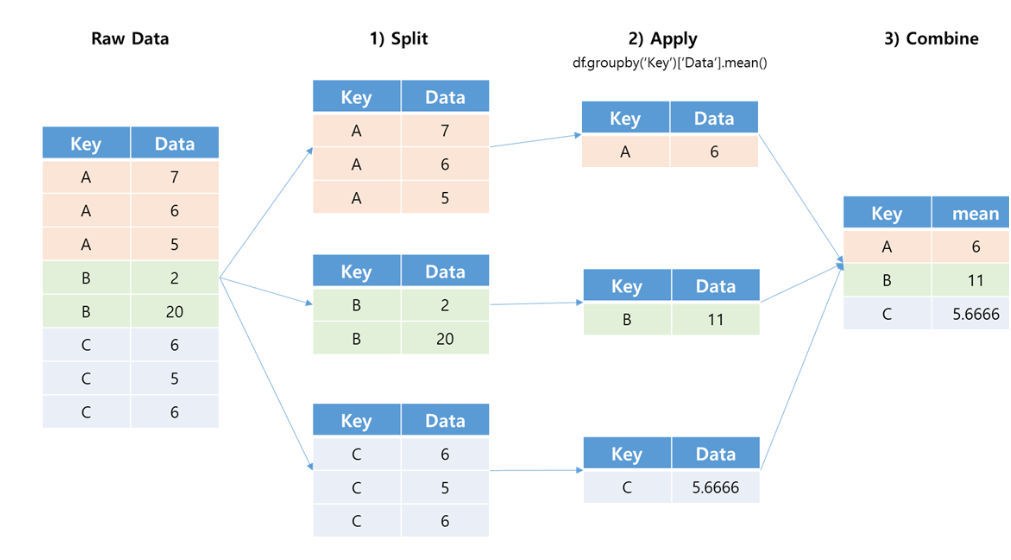


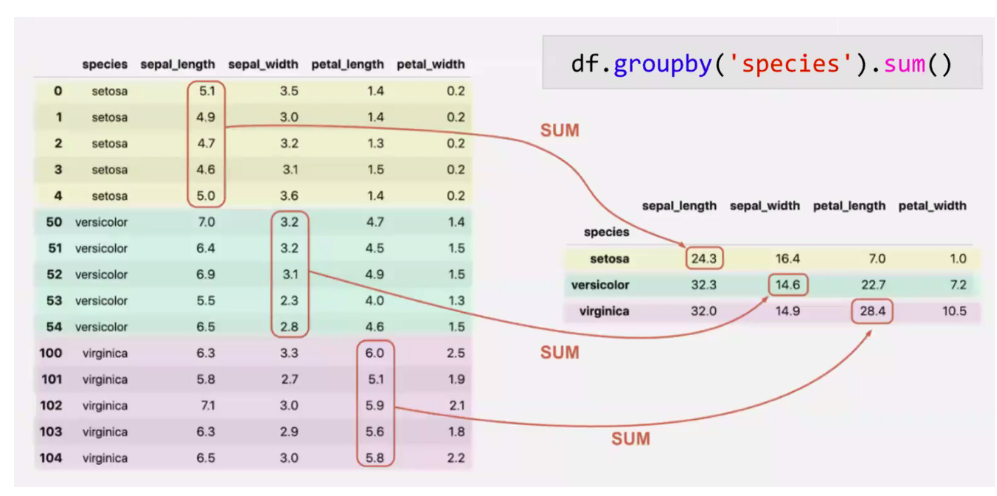
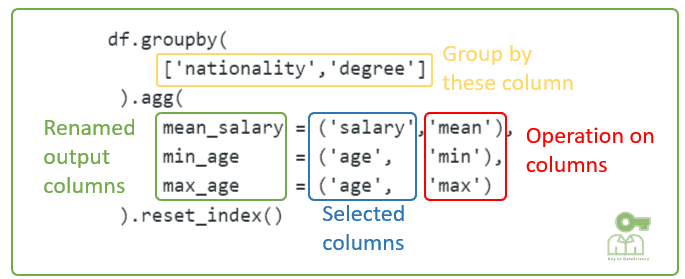


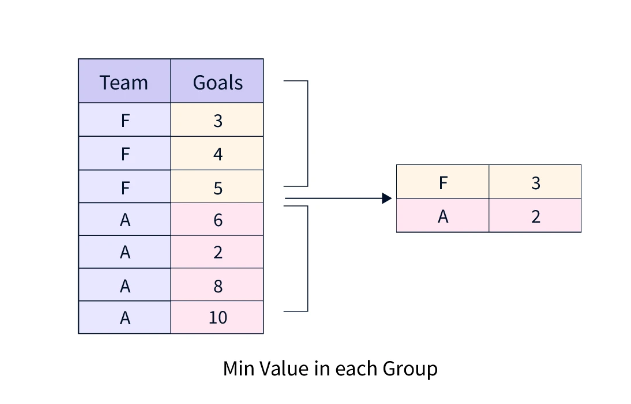  
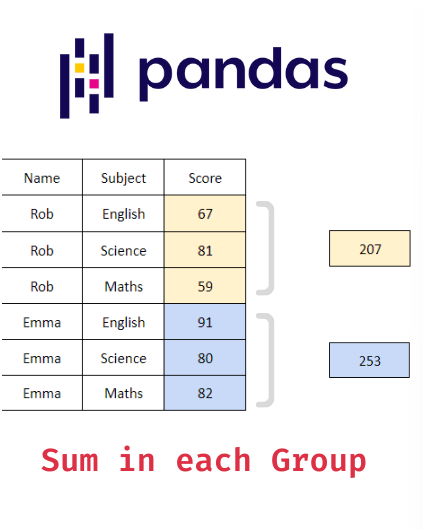


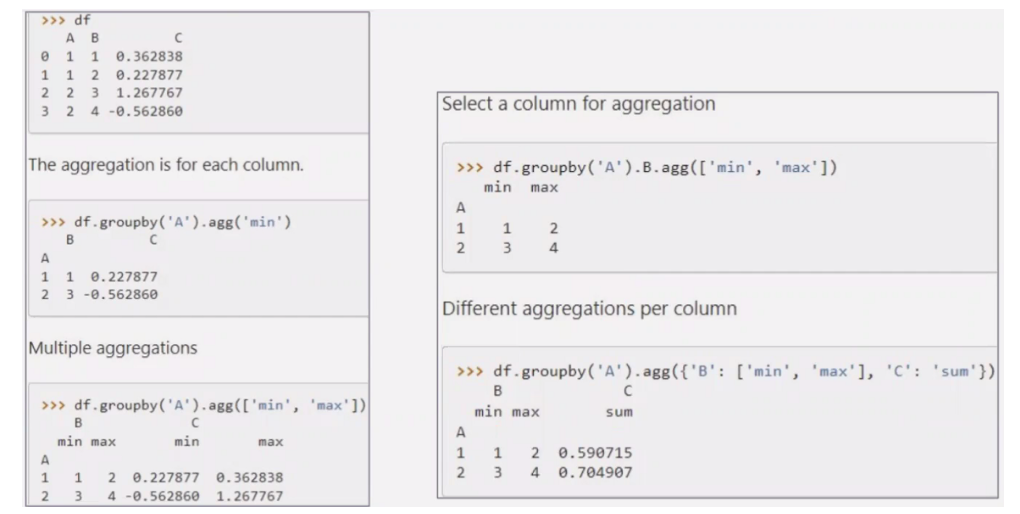
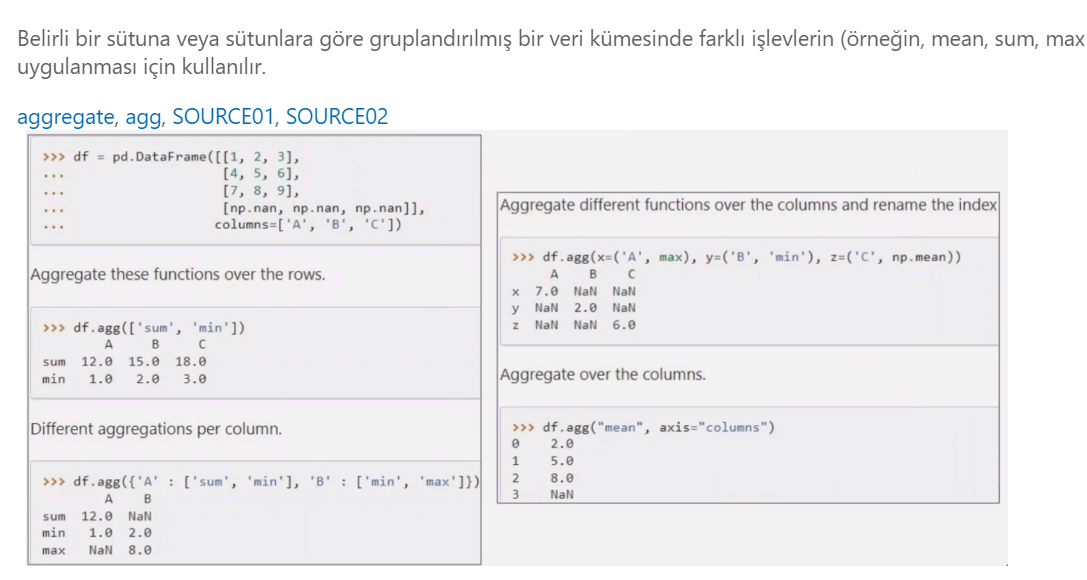

In [6]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [7]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Hatice', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Sales':[180, 160, 150, 180, 240, 200, 220, 160]}

In [8]:
df = pd.DataFrame(data)
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Hatice,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [9]:
df.agg([sum, min])  # "min"

,Company,Department,Person,Age,Sales
sum,AmazonAmazonOpenAIOpenAIAmazonOpenAIAmazonOpenAI,ITHRITHRITHRHRIT,AhmetHaticeFatmaMehmetZeynepAliYusufElif,254,1490
min,Amazon,HR,Ahmet,25,150


In [10]:
df.agg({"Age": sum, "Sales": max})

Age      254
Sales    240
dtype: int64

In [11]:
# df.groupby("Company") # Company gore gruplandiralim. Hata verir neden gruplandirmadan sonra bir fonk.vermeliyiz

In [12]:
# df.groupby("Company").mean() # hata verir

In [13]:
df.groupby("Company")["Sales"].mean()# compy gore grupla sales gore ort ver

Company
Amazon    200.0
OpenAI    172.5
Name: Sales, dtype: float64

In [14]:
df.groupby(["Company", "Department"])[["Sales"]].max()

Sales
Company Department       
Amazon  HR            220
        IT            240
OpenAI  HR            200
        IT            160

In [15]:
df.groupby("Company").agg([min,max])  # 

Department     Person         Age     Sales     
               min max    min     max min max   min  max
Company                                                 
Amazon          HR  IT  Ahmet  Zeynep  25  32   160  240
OpenAI          HR  IT    Ali  Mehmet  28  40   150  200

In [16]:
df

,Company,Department,Person,Age,Sales
0,Amazon,IT,Ahmet,32,180
1,Amazon,HR,Hatice,26,160
2,OpenAI,IT,Fatma,35,150
3,OpenAI,HR,Mehmet,40,180
4,Amazon,IT,Zeynep,25,240
5,OpenAI,HR,Ali,38,200
6,Amazon,HR,Yusuf,30,220
7,OpenAI,IT,Elif,28,160


In [17]:
# compare = df.groupby("Company") # karsilastir compyn gore hata verir

In [18]:
# compare.corr() corelasyon alamaz sayisal degerlerde olur.